<a href="https://colab.research.google.com/github/Hero0963/data_science/blob/main/data_science_ch06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# exercise_01

# read penguin data
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch06/penguin.csv')
df.info()

Mounted at /content/MyGoogleDrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                338 non-null    int64  
 1   Length_cm         315 non-null    float64
 2   Weight_g          329 non-null    float64
 3   Species           338 non-null    object 
 4   Scientific Name   338 non-null    object 
 5   Inspector         338 non-null    object 
 6   Measurement Date  338 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.6+ KB


In [2]:
# penguin data cleaning
df=df.drop_duplicates().reset_index(drop=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         309 non-null    float64
 2   Weight_g          323 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.3+ KB


,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.0,2847.0,Galapagos penguin,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.0,3625.0,Chinstrap penguin,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.0,3600.0,Chinstrap penguin,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.0,3282.0,Chinstrap penguin,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,NaN,5630.0,Gentoo penguin,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.0,3752.0,Chinstrap penguin,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.0,2300.0,Galapagos penguin,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.0,897.0,Little penguin,Eudyptula minor,Janet,1990/9/17
330,337,37.0,812.0,Little penguin,Eudyptula minor,Antisthenes,1990/9/22


In [3]:
species_list=df['Species'].unique().tolist()

for species in species_list:
    filter=df['Species']==species
    m_l=(df[filter]['Length_cm'].mean())
    m_w=(df[filter]['Weight_g'].mean())
    df.loc[filter,'Length_cm']=df.loc[filter,'Length_cm'].fillna(m_l)
    df.loc[filter,'Weight_g']=df.loc[filter,'Weight_g'].fillna(m_w)
  

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         332 non-null    float64
 2   Weight_g          332 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.3+ KB


,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.000000,2847.0,Galapagos penguin,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.000000,3625.0,Chinstrap penguin,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.000000,3600.0,Chinstrap penguin,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.000000,3282.0,Chinstrap penguin,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,87.090909,5630.0,Gentoo penguin,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.000000,3752.0,Chinstrap penguin,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.000000,2300.0,Galapagos penguin,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.000000,897.0,Little penguin,Eudyptula minor,Janet,1990/9/17
330,337,37.000000,812.0,Little penguin,Eudyptula minor,Antisthenes,1990/9/22


In [4]:
s={'Chinstrap penguin':0,'Little penguin':1,'Galapagos penguin':2,'Gentoo penguin':3,}
df['Species']=df['Species'].map(s)
df=df.astype({'Species': 'int'})
df

,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.000000,2847.0,2,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.000000,3625.0,0,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.000000,3600.0,0,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.000000,3282.0,0,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,87.090909,5630.0,3,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.000000,3752.0,0,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.000000,2300.0,2,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.000000,897.0,1,Eudyptula minor,Janet,1990/9/17
330,337,37.000000,812.0,1,Eudyptula minor,Antisthenes,1990/9/22


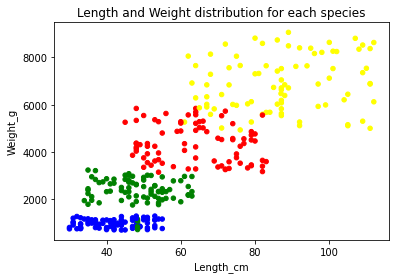

In [6]:
# plot Length_cm-Weight_g -> Species scatter graph
# color list = https://datascientyst.com/full-list-named-colors-pandas-python-matplotlib/

c={ 0:'red', 1:'blue',2:'green',3:'yellow',}
df['colors']=df['Species'].map(c)

df.plot(kind='scatter',x='Length_cm',y='Weight_g',c=df['colors'], title= 'Length and Weight distribution for each species')

In [7]:
df.to_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python_Data_Science/penguin06.csv',index=False)

In [15]:
# exercise_02

# read shoesize data
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch04/ShoeSize.csv')
df.info()

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10009 non-null  int64  
 1   Gender        10009 non-null  object 
 2   Height_cm     10004 non-null  float64
 3   Weight_kg     9999 non-null   float64
 4   Shoe size_cm  9994 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 391.1+ KB


In [16]:
# shoesize data cleaning
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10008
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10000 non-null  int64  
 1   Gender        10000 non-null  object 
 2   Height_cm     9995 non-null   float64
 3   Weight_kg     9990 non-null   float64
 4   Shoe size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 468.8+ KB


In [17]:
df=df.reset_index(drop=True)
df

,ID,Gender,Height_cm,Weight_kg,Shoe size_cm
0,1,Male,175.0,83.0,28.0
1,2,Male,195.0,112.0,31.0
2,3,Male,175.0,90.0,28.5
3,4,Female,154.0,58.0,22.5
4,5,Female,154.0,58.0,22.5
...,...,...,...,...,...
9995,9996,Female,157.0,59.0,23.0
9996,9997,Male,183.0,98.0,29.0
9997,9998,Female,162.0,61.0,24.5
9998,9999,Female,160.0,57.0,24.0


In [18]:
gender_list=df['Gender'].unique().tolist()

for gender in gender_list:
    filter=df['Gender']==gender
    m_l=(df[filter]['Height_cm'].mean())
    m_w=(df[filter]['Weight_kg'].mean())
    df.loc[filter,'Height_cm']=df.loc[filter,'Height_cm'].fillna(m_l)
    df.loc[filter,'Weight_kg']=df.loc[filter,'Weight_kg'].fillna(m_w)
  

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10000 non-null  int64  
 1   Gender        10000 non-null  object 
 2   Height_cm     10000 non-null  float64
 3   Weight_kg     10000 non-null  float64
 4   Shoe size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 390.8+ KB


,ID,Gender,Height_cm,Weight_kg,Shoe size_cm
0,1,Male,175.0,83.0,28.0
1,2,Male,195.0,112.0,31.0
2,3,Male,175.0,90.0,28.5
3,4,Female,154.0,58.0,22.5
4,5,Female,154.0,58.0,22.5
...,...,...,...,...,...
9995,9996,Female,157.0,59.0,23.0
9996,9997,Male,183.0,98.0,29.0
9997,9998,Female,162.0,61.0,24.5
9998,9999,Female,160.0,57.0,24.0


In [19]:
df=df.dropna(axis='rows',how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9985 non-null   int64  
 1   Gender        9985 non-null   object 
 2   Height_cm     9985 non-null   float64
 3   Weight_kg     9985 non-null   float64
 4   Shoe size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 468.0+ KB


In [20]:
df=df.reset_index(drop=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9985 entries, 0 to 9984
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9985 non-null   int64  
 1   Gender        9985 non-null   object 
 2   Height_cm     9985 non-null   float64
 3   Weight_kg     9985 non-null   float64
 4   Shoe size_cm  9985 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 390.2+ KB


,ID,Gender,Height_cm,Weight_kg,Shoe size_cm
0,1,Male,175.0,83.0,28.0
1,2,Male,195.0,112.0,31.0
2,3,Male,175.0,90.0,28.5
3,4,Female,154.0,58.0,22.5
4,5,Female,154.0,58.0,22.5
...,...,...,...,...,...
9980,9996,Female,157.0,59.0,23.0
9981,9997,Male,183.0,98.0,29.0
9982,9998,Female,162.0,61.0,24.5
9983,9999,Female,160.0,57.0,24.0


In [21]:
from random import randint
colors_list=[]
n=len(gender_list)
for i in range(n):
  colors_list.append('#%06X' % randint(0, 0xFFFFFF))

c=dict(zip(gender_list, colors_list))
df['colors']=df['Gender'].map(c)
df

,ID,Gender,Height_cm,Weight_kg,Shoe size_cm,colors
0,1,Male,175.0,83.0,28.0,#8EA56A
1,2,Male,195.0,112.0,31.0,#8EA56A
2,3,Male,175.0,90.0,28.5,#8EA56A
3,4,Female,154.0,58.0,22.5,#8EA6C1
4,5,Female,154.0,58.0,22.5,#8EA6C1
...,...,...,...,...,...,...
9980,9996,Female,157.0,59.0,23.0,#8EA6C1
9981,9997,Male,183.0,98.0,29.0,#8EA56A
9982,9998,Female,162.0,61.0,24.5,#8EA6C1
9983,9999,Female,160.0,57.0,24.0,#8EA6C1


In [22]:
# convert type
s={'Female':0,'Male':1}
df['Gender']=df['Gender'].map(s)
df=df.astype({'Gender': 'int'})
df=df.astype({'Shoe size_cm': 'int'})
df

,ID,Gender,Height_cm,Weight_kg,Shoe size_cm,colors
0,1,1,175.0,83.0,28,#8EA56A
1,2,1,195.0,112.0,31,#8EA56A
2,3,1,175.0,90.0,28,#8EA56A
3,4,0,154.0,58.0,22,#8EA6C1
4,5,0,154.0,58.0,22,#8EA6C1
...,...,...,...,...,...,...
9980,9996,0,157.0,59.0,23,#8EA6C1
9981,9997,1,183.0,98.0,29,#8EA56A
9982,9998,0,162.0,61.0,24,#8EA6C1
9983,9999,0,160.0,57.0,24,#8EA6C1


In [23]:
df['BMI']= df['Weight_kg'] / ((df['Height_cm']/100.0)**2)
df

,ID,Gender,Height_cm,Weight_kg,Shoe size_cm,colors,BMI
0,1,1,175.0,83.0,28,#8EA56A,27.102041
1,2,1,195.0,112.0,31,#8EA56A,29.454306
2,3,1,175.0,90.0,28,#8EA56A,29.387755
3,4,0,154.0,58.0,22,#8EA6C1,24.456063
4,5,0,154.0,58.0,22,#8EA6C1,24.456063
...,...,...,...,...,...,...,...
9980,9996,0,157.0,59.0,23,#8EA6C1,23.936062
9981,9997,1,183.0,98.0,29,#8EA56A,29.263340
9982,9998,0,162.0,61.0,24,#8EA6C1,23.243408
9983,9999,0,160.0,57.0,24,#8EA6C1,22.265625


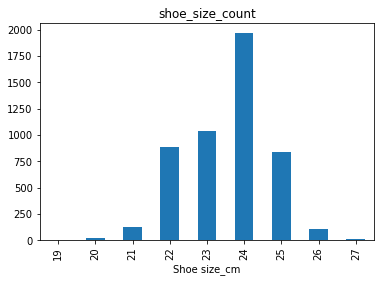

In [24]:
filter_female=df['Gender']==0
ax=df[filter_female].groupby(['Shoe size_cm'])['ID'].count().plot(kind='bar',title='shoe_size_count')

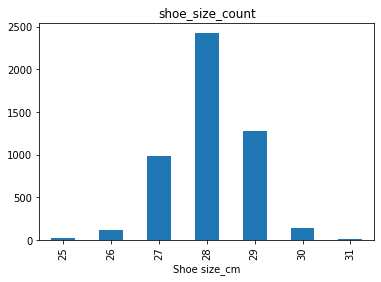

In [25]:
filter_male=df['Gender']==1
df[filter_male].groupby(['Shoe size_cm'])['ID'].count().plot(kind='bar',title='shoe_size_count')

13


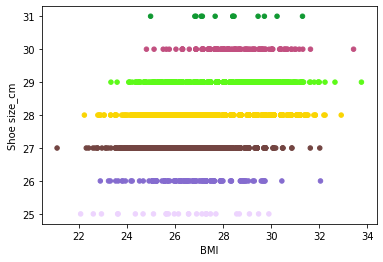

In [26]:
from random import randint
shoe_size_list=df['Shoe size_cm'].unique().tolist()
# print(shoe_size_list)
# print(type(shoe_size_list))
n=len(shoe_size_list)
colors_list=[]
for i in range(n):
  colors_list.append('#%06X' % randint(0, 0xFFFFFF))
                                    
# colors_list
color_converter = dict(zip(shoe_size_list, colors_list))
print(len(color_converter))

df['shoe_size_colors']=df['Shoe size_cm'].map(color_converter)

df[filter_male].plot(kind='scatter',x='BMI',y='Shoe size_cm',c=df[filter_male]['shoe_size_colors'])

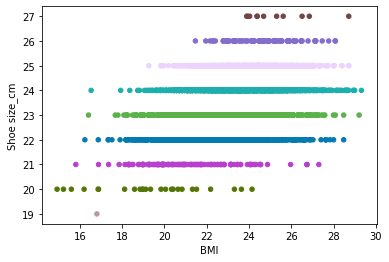

In [27]:
df[filter_female].plot(kind='scatter',x='BMI',y='Shoe size_cm',c=df[filter_female]['shoe_size_colors'])

In [28]:
df.to_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python_Data_Science/shoesize06.csv',index=False)